<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/AdaBoost_implementation_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [55]:
df = pd.DataFrame()

In [56]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [57]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

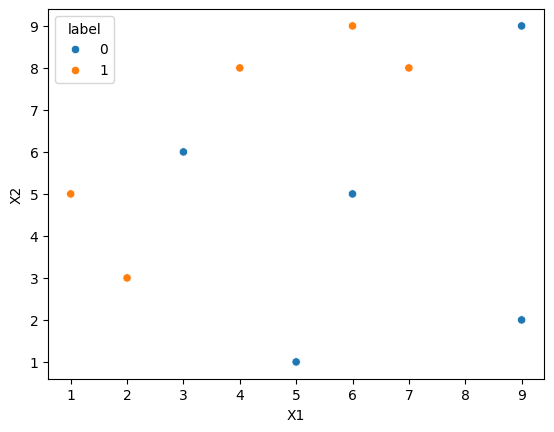

In [58]:
import seaborn as sns
sns.scatterplot(data=df, x='X1', y='X2', hue='label')

In [59]:
df['weights'] = 1/df.shape[0]

In [60]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)  # max_depth = 1  because it is a decision stump
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

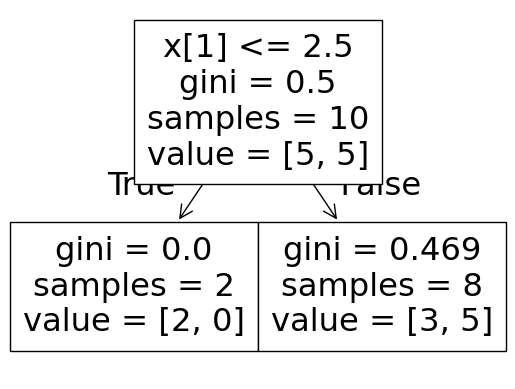

In [62]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

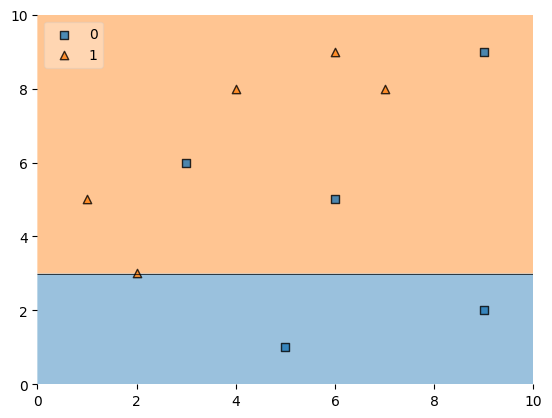

In [63]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [64]:
df['y_pred'] = dt1.predict(X)

In [65]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [66]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [67]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [68]:
def update_row_weights(row,alpha = 1.09):
  if row['label'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [69]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [70]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [71]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [72]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [73]:
df['normalized_weights'].sum()

np.float64(1.0)

In [74]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [75]:
def create_new_dataset(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [89]:
index_values = create_new_dataset(df)
index_values

[8, 6, 8, 6, 1, 4, 1, 5, 0, 3]

In [77]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [86]:
second_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0


In [79]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [80]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [81]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.625, 0.5, '  False')]

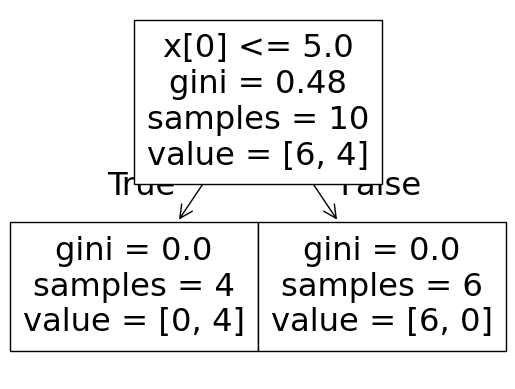

In [82]:
plot_tree(dt2)

<Axes: >

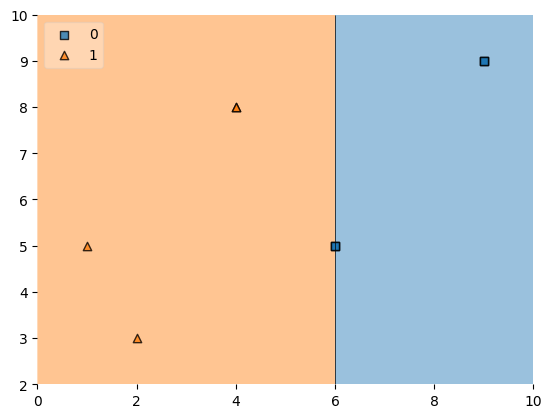

In [83]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [84]:
second_df['y_pred'] = dt2.predict(X)

In [85]:
second_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0


In [38]:
alpha2 = calculate_model_weight(0.1)

In [39]:
alpha2

np.float64(1.0986122886681098)

In [41]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [42]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427


In [43]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [44]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,0,0.297427,0.495694


In [45]:
second_df['normalized_weights'].sum()

np.float64(1.0)

In [46]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [47]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,1,0.033622,0.056034,0.056034,0.000000
4,5,1,0,0.1,0,0.033622,0.056034,0.112068,0.056034
3,4,8,1,0.1,1,0.033622,0.056034,0.168102,0.112068
3,4,8,1,0.1,1,0.033622,0.056034,0.224136,0.168102
6,6,5,0,0.1,0,0.033622,0.056034,0.280170,0.224136
4,5,1,0,0.1,0,0.033622,0.056034,0.336204,0.280170
3,4,8,1,0.1,1,0.033622,0.056034,0.392238,0.336204
2,3,6,0,0.1,0,0.033622,0.056034,0.448272,0.392238
5,6,9,1,0.1,1,0.033622,0.056034,0.504306,0.448272
0,1,5,1,0.1,0,0.297427,0.495694,1.000000,0.504306


In [48]:
index_values = create_new_dataset(second_df)

In [49]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [50]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [51]:
dt3 = DecisionTreeClassifier(max_depth=1)
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

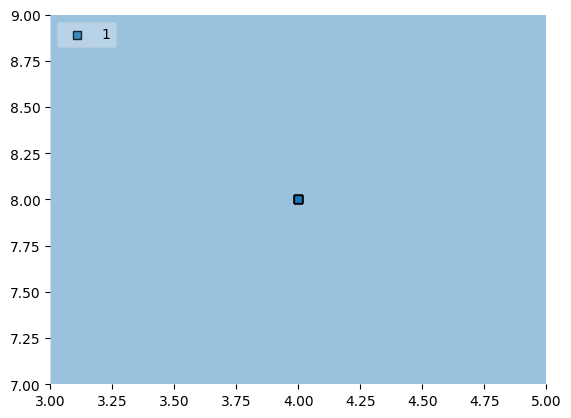

In [53]:
plot_decision_regions(X,y,clf=dt3,legend=2)